In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load

In [2]:
# Step 1: Load and preprocess the dataset
# Load the dataset
data = pd.read_csv("student_data.csv")

In [3]:
# Display dataset info
print("Dataset Info:")
print(data.info())
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4000 non-null   int64  
 1   Application mode                                4000 non-null   int64  
 2   Application order                               4000 non-null   int64  
 3   Course                                          4000 non-null   int64  
 4   Daytime/evening attendance	                     4000 non-null   int64  
 5   Previous qualification                          4000 non-null   int64  
 6   Previous qualification (grade)                  4000 non-null   float64
 7   Nacionality                                     4000 non-null   int64  
 8   Mother's qualification                          4000 non-null   int64  
 9   Father's qualification     

In [4]:
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                  

In [5]:
# Fill missing values for numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill missing values for non-numeric (categorical) columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# View the processed data
print("\nProcessed Dataset Head:")
print(data.head())


Processed Dataset Head:
   Marital status  Application mode  Application order    Course  \
0        -0.29632         -0.096700           2.505973 -4.274173   
1        -0.29632         -0.211087          -0.554057  0.188719   
2        -0.29632         -1.011796           2.505973  0.098312   
3        -0.29632         -0.096700           0.210951  0.443728   
4         1.34307          1.161557          -0.554057 -0.420549   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.356034               -0.349036   
1                      0.356034               -0.349036   
2                      0.356034               -0.349036   
3                      0.356034               -0.349036   
4                     -2.808717               -0.349036   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.802086     -0.12717               -0.040439   
1                        2.069024     -0.12717               -1

In [6]:
# Map the target variable to binary classes
# 0 = Successful graduation, 1 or 2 = Dropped out or At risk
data['Target'] = data['Target'].map({0: 0, 1: 1, 2: 1})

# Verify the changes
print("\nProcessed Dataset Head with Target:")
print(data.head())


Processed Dataset Head with Target:
   Marital status  Application mode  Application order    Course  \
0        -0.29632         -0.096700           2.505973 -4.274173   
1        -0.29632         -0.211087          -0.554057  0.188719   
2        -0.29632         -1.011796           2.505973  0.098312   
3        -0.29632         -0.096700           0.210951  0.443728   
4         1.34307          1.161557          -0.554057 -0.420549   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.356034               -0.349036   
1                      0.356034               -0.349036   
2                      0.356034               -0.349036   
3                      0.356034               -0.349036   
4                     -2.808717               -0.349036   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.802086     -0.12717               -0.040439   
1                        2.069024     -0.12717     

c:\Users\Uttam\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Uttam\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


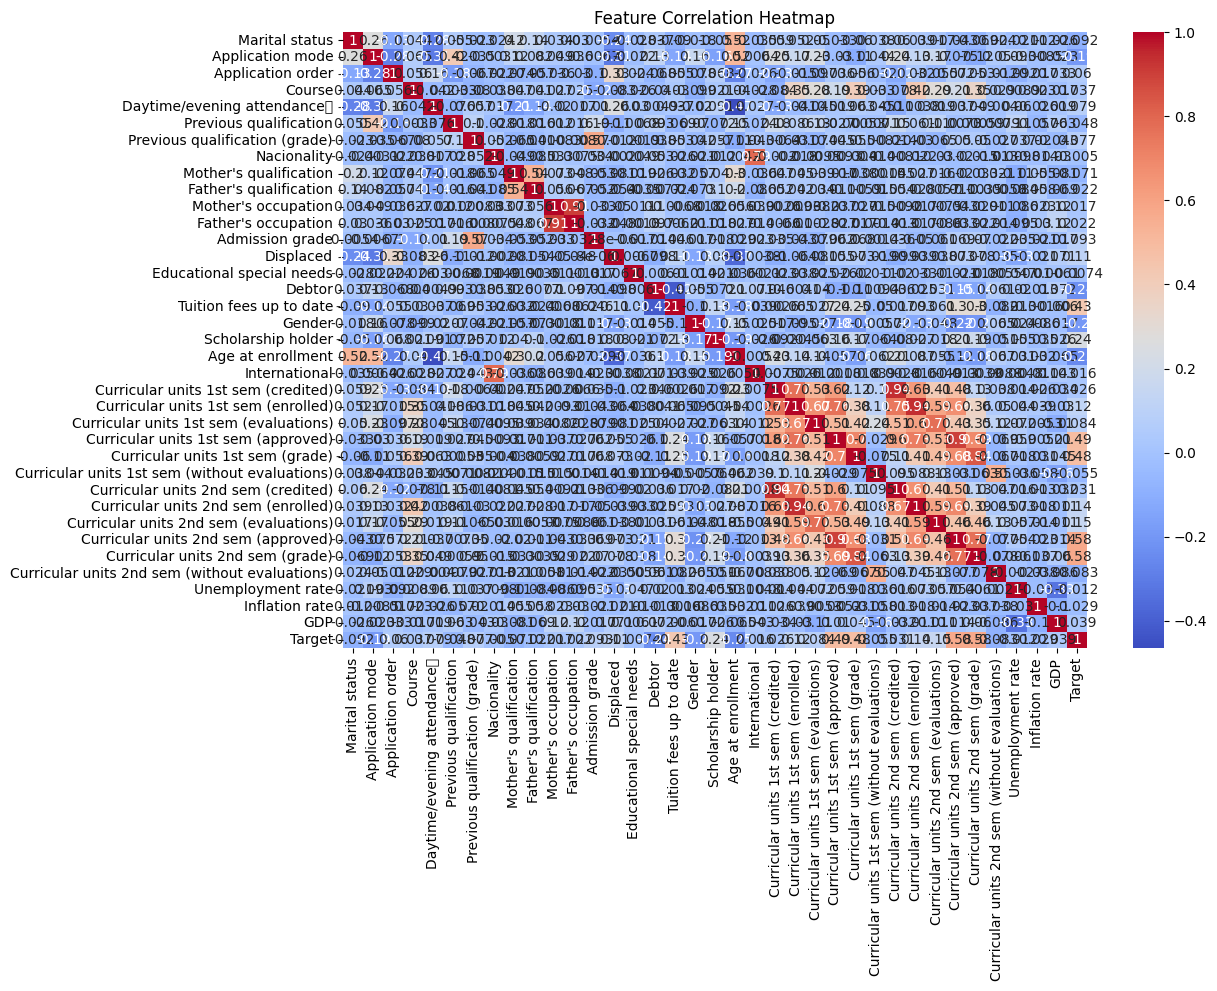


Feature correlations with target:
Target                                            1.000000
Curricular units 2nd sem (grade)                  0.576160
Curricular units 2nd sem (approved)               0.575326
Curricular units 1st sem (approved)               0.485542
Curricular units 1st sem (grade)                  0.483902
Tuition fees up to date                           0.429517
Scholarship holder                                0.242555
Curricular units 2nd sem (evaluations)            0.152781
Curricular units 2nd sem (enrolled)               0.137923
Curricular units 1st sem (enrolled)               0.120217
Displaced                                         0.111769
Admission grade                                   0.092721
Curricular units 1st sem (evaluations)            0.084463
Daytime/evening attendance\t                      0.078929
Previous qualification (grade)                    0.076815
Application order                                 0.060420
GDP                  

In [7]:
# Step 2: Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Example: Select the most correlated feature with the target
target_correlation = correlation_matrix["Target"].sort_values(ascending=False)
print("\nFeature correlations with target:")
print(target_correlation)

In [8]:
# Step 3: Split data
X = data.drop("Target", axis=1)  # Target is the column to predict
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [10]:
# Train models
print("\nTraining Models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Training Models...
Logistic Regression trained successfully.
Decision Tree trained successfully.
KNN trained successfully.
Random Forest trained successfully.


In [11]:
# Step 4: Evaluate models using k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("\nEvaluating Models...")
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store results
    results[name] = {
        "Accuracy (CV Mean)": cv_scores.mean(),
        "Accuracy (CV Std)": cv_scores.std(),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


Evaluating Models...


In [12]:
# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy (Mean): {metrics['Accuracy (CV Mean)']:.2f}")
    print(f"Accuracy (Std): {metrics['Accuracy (CV Std)']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


Model: Logistic Regression
Accuracy (Mean): 0.88
Accuracy (Std): 0.01
Confusion Matrix:
[[202  66]
 [ 26 506]]

Model: Decision Tree
Accuracy (Mean): 0.79
Accuracy (Std): 0.01
Confusion Matrix:
[[196  72]
 [ 84 448]]

Model: KNN
Accuracy (Mean): 0.84
Accuracy (Std): 0.01
Confusion Matrix:
[[173  95]
 [ 19 513]]

Model: Random Forest
Accuracy (Mean): 0.87
Accuracy (Std): 0.01
Confusion Matrix:
[[197  71]
 [ 40 492]]


In [13]:
# Step 5: Feature importance for the best model (Logistic Regression)
# Logistic Regression does not have a straightforward feature importance, so we use coefficients
best_model = models["Logistic Regression"]
coefficients = best_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Logistic Regression:")
print(feature_importance)


Feature Importance for Logistic Regression:
                                           Feature  Importance
30             Curricular units 2nd sem (approved)    1.714066
24             Curricular units 1st sem (approved)    1.150443
16                         Tuition fees up to date    0.858237
20                                   International    0.331224
10                             Mother's occupation    0.305055
31                Curricular units 2nd sem (grade)    0.295912
18                              Scholarship holder    0.185421
29          Curricular units 2nd sem (evaluations)    0.127160
5                           Previous qualification    0.123713
32  Curricular units 2nd sem (without evaluations)    0.074947
26  Curricular units 1st sem (without evaluations)    0.073136
12                                 Admission grade    0.069951
23          Curricular units 1st sem (evaluations)    0.062234
9                           Father's qualification    0.057291
0         

C:\Users\Uttam\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


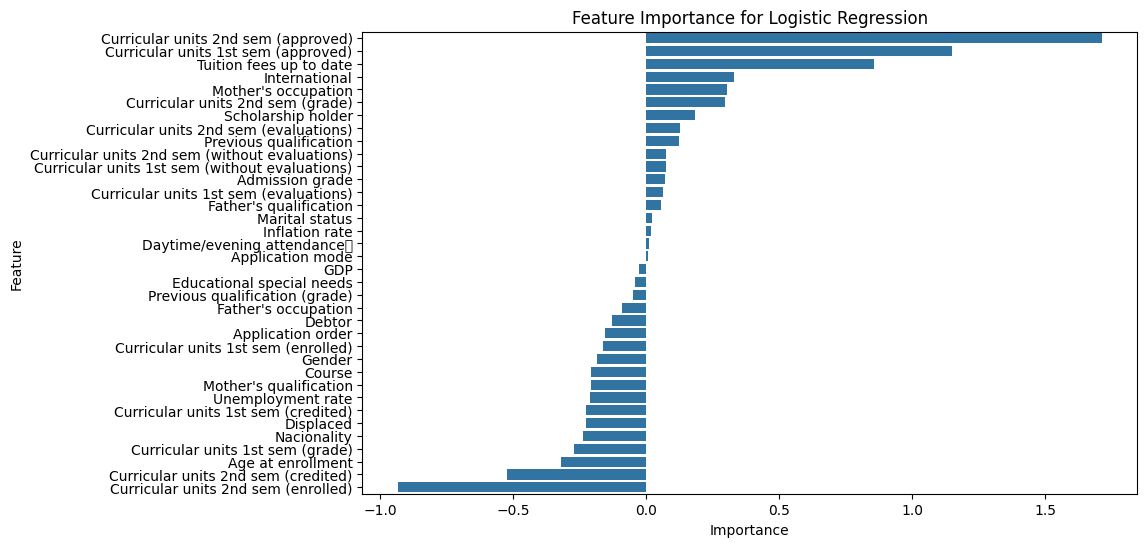

In [14]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance for Logistic Regression")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [15]:
# Step 6: Save the best model (Logistic Regression)
dump(best_model, "best_model.pkl")
print("\nBest model saved as 'best_model.pkl'.")


Best model saved as 'best_model.pkl'.


In [16]:
# Step 7: Reload and inspect the saved model
print("\nReloading the saved model...")
loaded_model = load("best_model.pkl")


Reloading the saved model...


In [17]:
# Verify the loaded model type
print(f"Loaded Model Type: {type(loaded_model)}")

Loaded Model Type: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [18]:
# If the model is Logistic Regression, display its coefficients
if hasattr(loaded_model, "coef_"):
    print("\nCoefficients of the Reloaded Logistic Regression Model:")
    print(loaded_model.coef_)
else:
    print("\nThe reloaded object does not have coefficients. Please verify the saved model.")


Coefficients of the Reloaded Logistic Regression Model:
[[ 0.02039517  0.00689888 -0.15530332 -0.20620018  0.01102265  0.12371296
  -0.05089724 -0.2387931  -0.20674843  0.05729128  0.3050549  -0.08887193
   0.06995088 -0.2274924  -0.0418266  -0.12827087  0.85823709 -0.18388179
   0.1854207  -0.31954586  0.33122351 -0.22712955 -0.16291436  0.06223432
   1.15044273 -0.27200839  0.07313594 -0.52240387 -0.93401761  0.12715999
   1.71406627  0.2959122   0.07494721 -0.20998375  0.01853342 -0.02558915]]
